***BASIC STATISTICS FOR ANALYSIS***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import math

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import yfinance as yf


In [5]:
symbol = 'AAPL'
market = '^GSPC'
start = '2014-01-01'
end = '2024-01-01'

#Read Data
df = yf.download(symbol, start, end)
dfm = yf.download(market, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
df.columns = df.columns.get_level_values(0)
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2014-01-02,17.192827,17.314050,17.158326,17.272089,234684800
2014-01-03,16.815170,17.210543,16.798074,17.184434,392467600
2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800
2014-01-07,16.785955,16.969965,16.720060,16.918990,317209200
2014-01-08,16.892252,16.957525,16.743987,16.747716,258529600


In [7]:
dfm.columns = dfm.columns.get_level_values(0)
dfm.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2014-01-02,1831.979980,1845.859985,1827.739990,1845.859985,3080600000
2014-01-03,1831.369995,1838.239990,1829.130005,1833.209961,2774270000
2014-01-06,1826.770020,1837.160034,1823.729980,1832.310059,3294850000
2014-01-07,1837.880005,1840.099976,1828.709961,1828.709961,3511750000
2014-01-08,1837.489990,1840.020020,1831.400024,1837.900024,3652140000


In [8]:
df.shape

(2516, 5)

In [9]:
new_df = pd.DataFrame({symbol : df['Close'], market : dfm['Close']}, index = df.index)

#compute returns
new_df[['stock_returns', 'market_returns']] = new_df[[symbol, market]] / new_df[[symbol, market]].shift(1) -1
new_df = new_df.dropna()
covmat = np.cov(new_df["stock_returns"], new_df["market_returns"])

#calculate measures
beta = covmat[0,1]/covmat[1,1]
alpha = np.mean(new_df['stock_returns']) - beta*np.mean(new_df['market_returns'])

print('Beta: ', beta)
print('Alpha: ', alpha)

Beta:  1.1899099479624184
Alpha:  0.0005905214049333694


In [10]:
close = df['Close']

***MEAN THE AVERAGE***

In [11]:
mean = np.mean(close)
print('Mean of Close: ', mean)

Mean of Close:  75.43264184392314


***MEDIAN IS THE MIDDLEMOST VALUE***

In [12]:
median = np.median(close)
median

np.float64(45.75668907165527)

***MODE: MOST FREQUENT VALUE VALUE IN THE SERIES***

In [13]:
mode = stats.mode(close, keepdims = True)   #keepdims ensures output is always array-like
print("The modal value is {} with a count of {}".format(mode.mode[0], mode.count[0]))

The modal value is 18.5214786529541 with a count of 2


***RANGE IS A MEASURE OF HOW SPREAD APART THE VALUES ARE***

In [14]:
range_of_stock = np.ptp(close)
range_of_stock

np.float64(181.1352071762085)

***VARIANCE IS A MEASURE OF HOW VARIABLE THE DATA IS***

In [15]:
variance = np.var(close)
variance

np.float64(3170.533934186912)

***STANDARD DEVIATION IS THE SQ ROOT OF THE VARIANCE AND IS A MEASURE HOW THE DATA IS SPREAD OUT***

In [16]:
standard_deviation = np.std(close)
standard_deviation

np.float64(56.30749447619662)

***STANDARD ERROR is the mean estimates the variability between sample means that you would obtain if you took multiple samples from the same population***

In [17]:
standard_error = stats.sem(close)
standard_error

np.float64(1.1227865672606876)

***Z-score indicates how many standard deviations a data point is from the mean, and whether it lies above (positive Z) or below (negative Z) the mean***

In [18]:
z = np.abs(stats.zscore(close))
print(z)

[1.03431728 1.04102433 1.03939591 ... 2.06567871 2.07325966 2.05474777]


***CONTINGENCY TABLE SHOWS CORRELATIONS BETWEEN TWO VARIABLES***

In [19]:
data_crosstab = pd.crosstab(df['High'], df['Low'], margins = False)
print(data_crosstab)

Low         15.340907   15.438828   15.498502   15.519637   15.605732   \
High                                                                     
15.588948            1           0           0           0           0   
15.743440            0           1           0           0           0   
15.770476            0           0           1           0           0   
15.781665            0           0           0           1           0   
15.835443            0           0           0           0           0   
...                ...         ...         ...         ...         ...   
196.242892           0           0           0           0           0   
196.264932           0           0           0           0           0   
196.560561           0           0           0           0           0   
196.957650           0           0           0           0           0   
198.168786           0           0           0           0           0   

Low         15.627187   15.735660   1

***SCATTER PLOT shows 2 variables that are plotted along show correlation or not***

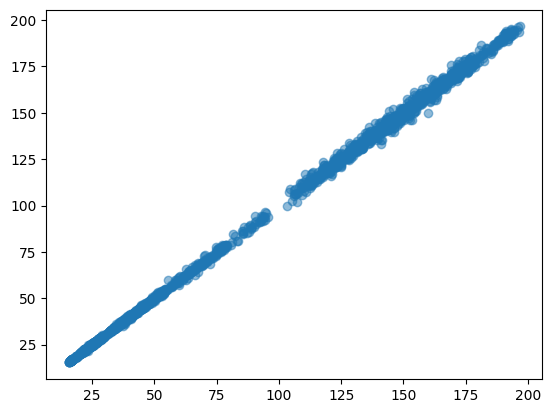

In [20]:
plt.scatter(df['Close'], df['Open'], alpha = 0.5)

***REGRESSION is a measure of the relation between the mean value of one variable (e.g. output) and corresponding values of other variables***

In [21]:
df.shape


(2516, 5)

In [22]:
from sklearn.linear_model import LinearRegression

x = np.array(df['Open']).reshape(2516, -2)
y = np.array(df['Close'])

LR = LinearRegression().fit(x, y)
LR.score(x, y)

0.9993997391760201

In [23]:
LR.coef_

array([1.00067419])

In [24]:
LR.intercept_

np.float64(0.01187398541073037)

In [25]:
LR.predict(x)

array([ 17.29560759,  17.20789359,  16.72858278, ..., 191.23134936,
       192.87043517, 192.6320252 ], shape=(2516,))

***Elementary Probability Theory the outcome that could happen:***

**Monte Carlo method is an experimentals of computational algorithms that rely on repeated random samples**

In [26]:
df["Returns"] = df['Close'].pct_change()
df['Returns'] = df['Returns'].dropna()

df.dropna()

Price,Close,High,Low,Open,Volume,Returns
Date,,,,,,
2014-01-03,16.815170,17.210543,16.798074,17.184434,392467600,-0.021966
2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800,0.005453
2014-01-07,16.785955,16.969965,16.720060,16.918990,317209200,-0.007151
2014-01-08,16.892252,16.957525,16.743987,16.747716,258529600,0.006332
2014-01-09,16.676535,16.997931,16.640167,16.996065,279148800,-0.012770
...,...,...,...,...,...,...
2023-12-22,192.192551,193.989390,191.567126,193.761051,37122800,-0.005548
2023-12-26,191.646561,192.480450,191.428159,192.202487,28919300,-0.002841
2023-12-27,191.745834,192.093296,189.700813,191.090644,48087700,0.000518


In [27]:
values = []
S = df['Returns'][-1] #starting stock price
T = 252  #Number of trading days
mu = df['Returns'].mean()  
sigma = df['Returns'].std()*math.sqrt(252) #volatility

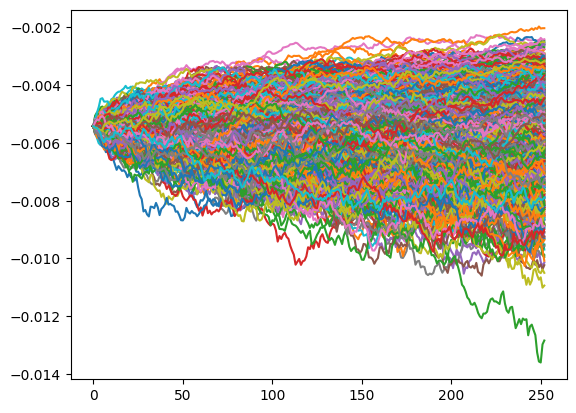

In [28]:
for i in range(1000):
    # Create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,sigma/math.sqrt(T),T)+1
    
    # Set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    # Plot the data
    plt.plot(price_list)
plt.show()

***RANDOM VARIABLES AND PROBABILITY DISTRIBUTIONS***

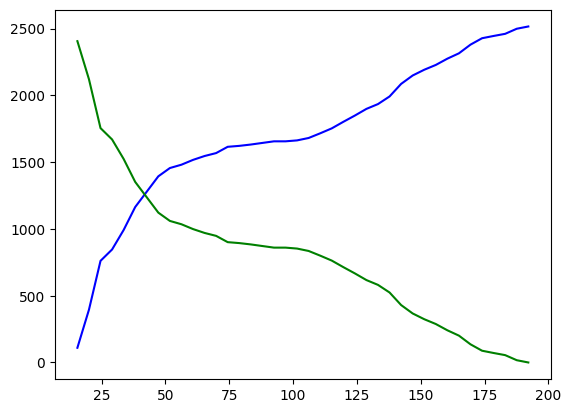

In [29]:
#CUMULATIVE DISTRIBUTION

data = df['Close']
values, base = np.histogram(data, bins = 40)

#evaluate the cumulative
cumulative = np.cumsum(values)

#plot the cumulative functions
plt.plot(base[: -1], cumulative, c = 'blue')

#plot the survival function
plt.plot(base[: -1], len(data) - cumulative, c = 'green')

***PROBABILITY DENSITY FUNCTION***


PDF is continuous random variable and have value that is given sample in the sample space can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample

Text(0.5, 1.0, 'Probability Density Function')

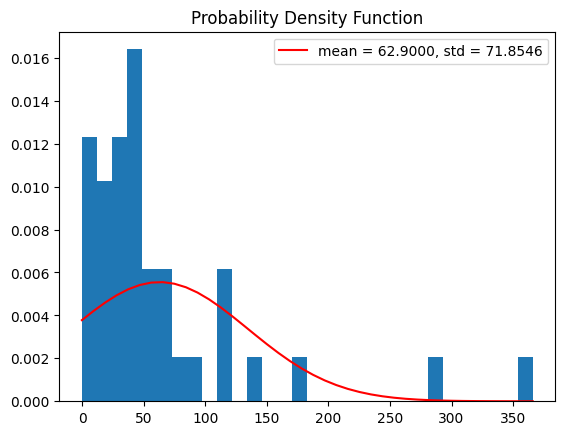

In [30]:
value = df['Returns'][1:]
x = np.linspace(value.min(), values.max(), len(values))
loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc = loc, scale = scale)
label = 'mean = %.4f, std = %.4f' % (loc, scale)

fig, ax = plt.subplots()
ax.hist(values, bins =30, density = True)
ax.plot(x, param_density, 'r-', label = label)
ax.legend(loc = 'best')
ax.set_title("Probability Density Function")


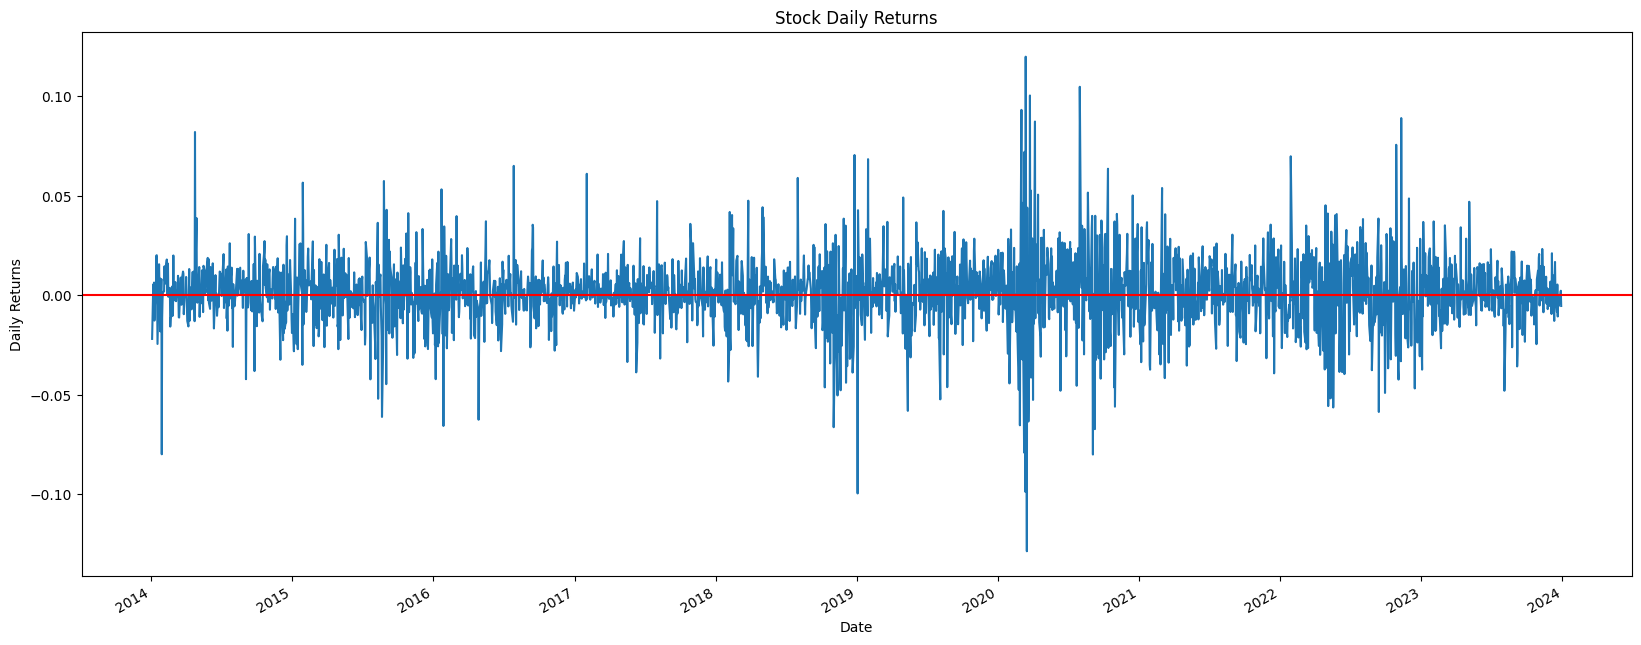

In [31]:
#log return goes up and down during the period

df['Returns'].plot(figsize=(20,8))
plt.title("Stock Daily Returns")
plt.axhline(0, color = 'Red')
plt.ylabel('Daily Returns')
plt.show()

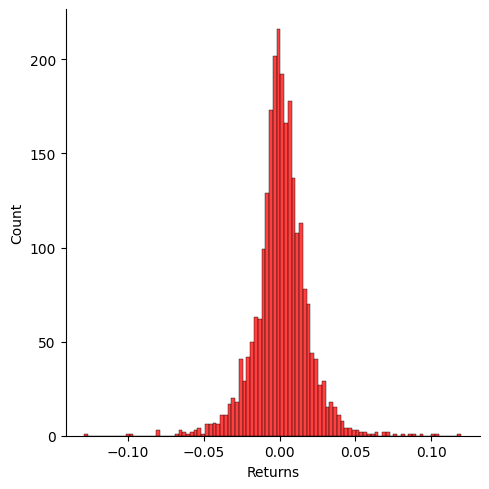

In [32]:
sns.displot(df['Returns'].dropna(), bins = 100, color = 'red')

***CUMULATIVE PROBABILITY DISTRIBUTION***

Text(0.5, 1.0, 'Cumulative Probability Distribution')

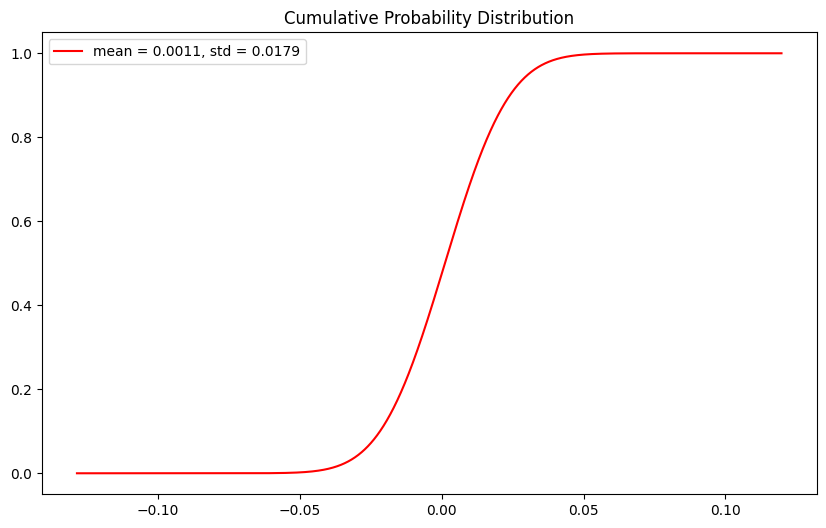

In [33]:
values = df['Returns'][1:]
x = np.linspace(values.min(), values.max(), len(values))
loc, scale = stats.norm.fit(values)
param_density = stats.norm.cdf(x, loc = loc, scale = scale)
label = 'mean = %.4f, std = %.4f' % (loc, scale)

fig, ax = plt.subplots(figsize = (10, 6))
#ax.hist(values, bins = 30, density=True)
ax.plot(x, param_density, 'r-', label = label)
ax.legend(loc = 'best')
ax.set_title("Cumulative Probability Distribution")

***BINOMIAL DISTRIBUTION***

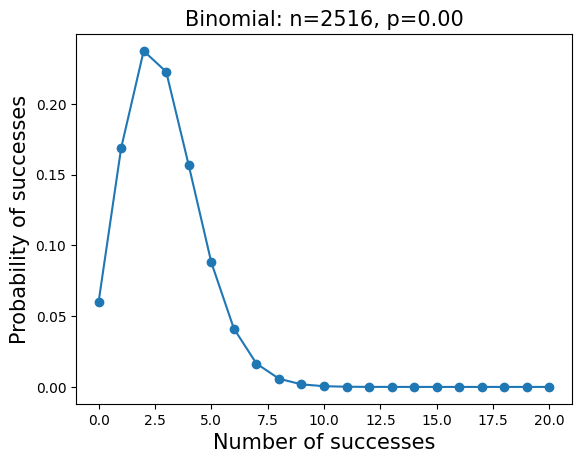

In [34]:
from scipy.stats import binom

n = len(df['Returns'])
p = df['Returns'].mean()
k = np.arange(0, 21)
binomianl = binom.pmf(k, n, p)

plt.plot(k, binomianl, 'o-')
plt.title("Binomial: n=%i, p=%.2f" % (n,p), fontsize=15)
plt.xlabel("Number of successes", fontsize=15)
plt.ylabel("Probability of successes", fontsize=15)
plt.show()


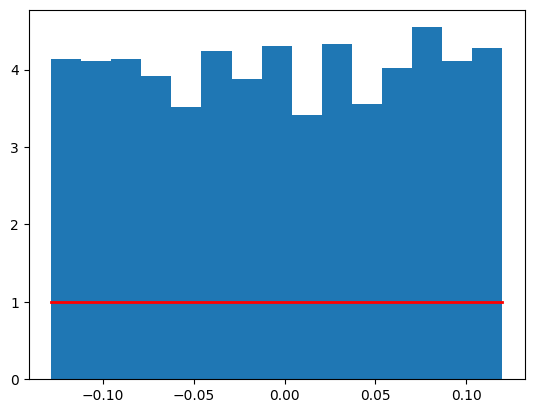

In [35]:
s = np.random.uniform(values.min(), values.max(), len(values))

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 15, density = True)
plt.plot(bins, np.ones_like(bins), linewidth = 2, color = 'r')
plt.show()

Mean: 2.824200
SD: 1.671100


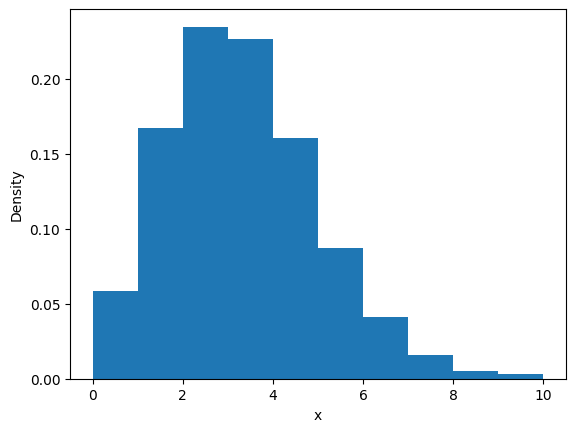

In [36]:
binom_sim = binom.rvs(n = n, p = p, size=10000)
print("Mean: %f" % np.mean(binom_sim))
print("SD: %f" % np.std(binom_sim, ddof=1))
plt.hist(binom_sim, bins = 10, density = True)
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

***POISSON DISTRIBUTION***

In [37]:
rate = 3  #error rate
n = np.arange(0, 10) # number of trials
y = stats.poisson.pmf(n, rate)

y

array([0.04978707, 0.14936121, 0.22404181, 0.22404181, 0.16803136,
       0.10081881, 0.05040941, 0.02160403, 0.00810151, 0.0027005 ])

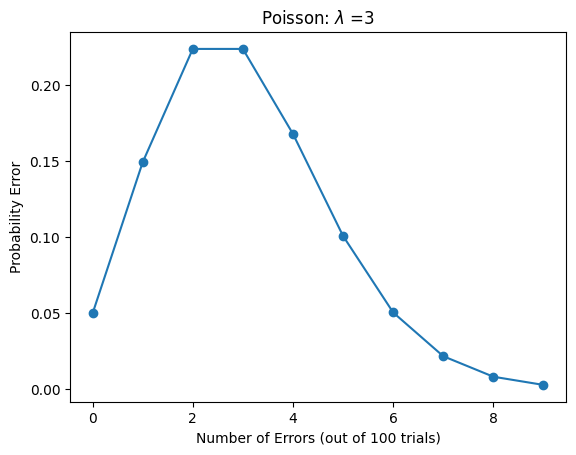

In [38]:
plt.plot(n, y, 'o-')
plt.title('Poisson: $\lambda$ =%i' % rate)
plt.ylabel('Probability Error')
plt.xlabel('Number of Errors (out of 100 trials)')
plt.show()

Mean: 2.850000
Standard Deviation: 1.976503


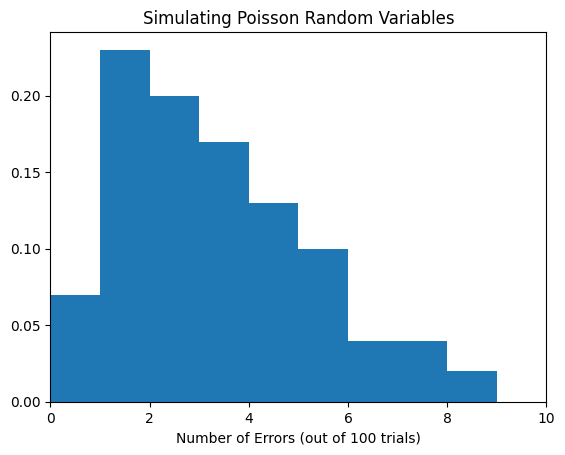

In [39]:
data = stats.poisson.rvs(mu=3, loc=0, size=100)
print("Mean: %f" % np.mean(data))
print("Standard Deviation: %f" % np.std(data, ddof=1))

plt.hist(data, bins = 9, density = True)
plt.xlim(0,10)
plt.xlabel('Number of Errors (out of 100 trials)')
plt.title('Simulating Poisson Random Variables')
plt.show()

***BETA DISTRIBUTION***

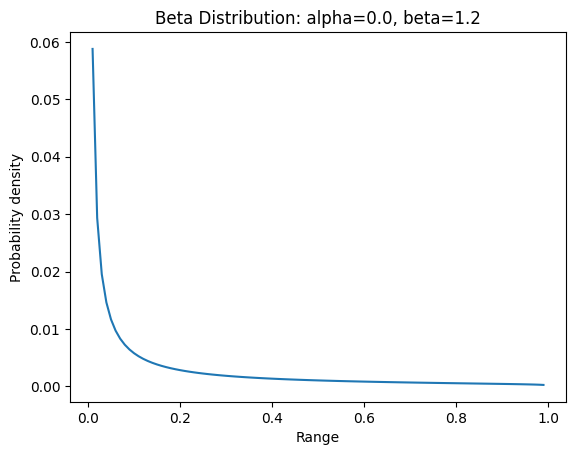

In [40]:
alpha = alpha 
beta = beta
x = np.arange(0, 1, 0.01)
y = stats.beta.pdf(x, alpha, beta)
plt.plot(x, y)
plt.title('Beta Distribution: alpha=%.1f, beta=%.1f' % (alpha,beta))
plt.xlabel('Range')
plt.ylabel('Probability density')
plt.show()

***EXPONENTIAL DISTRIBUTION***

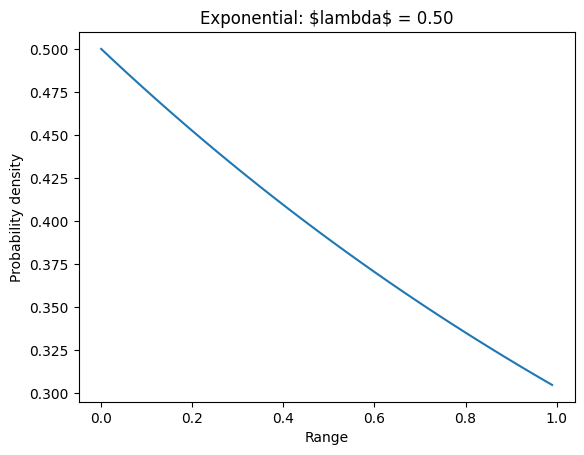

In [41]:
lambd = 0.5 #lambda
x = np.arange(0, 1, 0.01)
y = lambd * np.exp(-lambd * x)
plt.plot(x, y)
plt.title('Exponential: $lambda\$ = %.2f' % lambd)
plt.xlabel("Range")
plt.ylabel("Probability density")
plt.show()

***LOGNORMAL DISTRIBUTION***

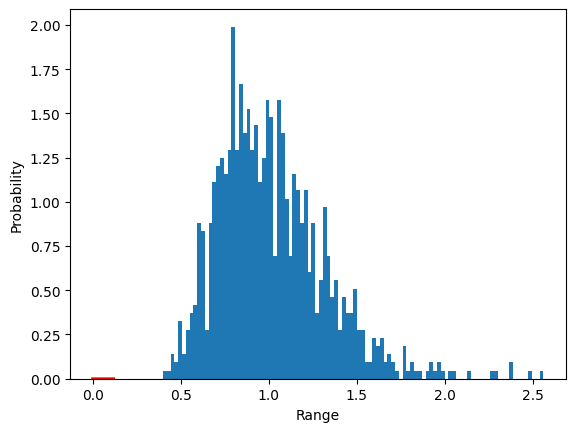

In [42]:
from scipy.stats import lognorm

s = np.random.lognormal(mu, sigma, 1000)

count, bias, ignored = plt.hist(s, 100, density = True, align = 'mid')
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.xlabel('Range')
plt.ylabel('Probability')
plt.axis('tight')
plt.show()

**STATISTICAL HYPOTHESIS TEST**

In [43]:
#CALCULATE TEST STATISTICS

mu = df['Returns'].mean()
sigma = df['Returns'].std(ddof=1)
n = df['Returns'].shape[0]

#if sample size n is large enough, we can use z-dist, instead of t-dist
#mu =0 under the null hypothesis

zhat = (mu - 0) / (sigma/n**0.5)
print(zhat)

3.1365582855543255


In [44]:
#ASET DECISION CRITERIA

#CONFIDENCE LEVEL
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft   #z-distribution is symentric
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


In [45]:
#DECISION TO REJECT H0 OR NOT

print('At significant level of {}, shall we reject : {}'.format(alpha, zhat > zright or zhat < zleft))

At significant level of 0.05, shall we reject : True


In [46]:
#ONE TAIL TEST

mu = df['Returns'].mean()
sigma = df['Returns'].std(ddof = 1)
n = df['Returns'].shape[0]

#if sample size n is large enough, we can use t-distribution, instead of t-distribution
#mu = 0 under the null hypothesis

zhat = (mu - 0) / (sigma/n**0.5)
print(zhat)

3.1365582855543255


In [47]:
alpha = 0.05

zright = norm.ppf(1 - alpha, 0, 1)
print(zright)

1.6448536269514722


In [48]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat > zright))


At significant level of 0.05, shall we reject: True


In [49]:
#TEST FOR P-VALUE

p_value = 1 - norm.cdf(zhat, 0, 1)
print(p_value)

0.0008547172751084409


In [50]:
print('At significant level of {}, shall we reject: {}'.format(alpha, p_value < alpha))


At significant level of 0.05, shall we reject: True


In [54]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
import scipy as sp


W_test, p_value = shapiro(df['Returns'])
print(p_value)

nan


In [52]:
# confidence level is 95%, that is, alpha=0.05
print('Shapiro-Wilk Test')
print('-'*40)

alpha = 0.05
if p_value < alpha:  # null hypothesis: x comes from a normal distribution
    print("H0: the sample has a Gaussian distribution.")
    print("The null hypothesis can be rejected")
else:
    print("H1: the sample does not have a Gaussian distribution.")
    print("The null hypothesis cannot be rejected")

Shapiro-Wilk Test
----------------------------------------
H1: the sample does not have a Gaussian distribution.
The null hypothesis cannot be rejected


In [55]:
# Anderson_Darling Test
from scipy.stats import anderson

result = anderson(df['Returns'].dropna())
result

AndersonResult(statistic=np.float64(28.894097949353636), critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(0.0011179387886338006), scale=np.float64(0.017878043145561958))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [56]:
print('D’Agostino’s K^2 Test')
print('-'*40)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

D’Agostino’s K^2 Test
----------------------------------------
Statistic: 28.894
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


***F-TEST***

In [58]:
import scipy 
from scipy.stats import f

F = df['Close'].var() / df['Returns'].var()
df1 = len(df['Close']) - 1
df2 = len(df['Returns']) - 1
p_value = scipy.stats.f.cdf(F, df1, df2)


In [59]:
print('F-test')
print('-'*40)
print('Statistic: %.3f' % p_value)
# interpret the significance
alpha = 0.05
if p_value > alpha:
	print('H0: the two samples are independent. p=%.3f' % p_value)
else:
	print('H1: there is a dependency between the samples. p=%.3f' % p_value)

F-test
----------------------------------------
Statistic: 1.000
H0: the two samples are independent. p=1.000


***PEARSON'S CORRELATION COEFFICIENT***

In [60]:
from scipy.stats import pearsonr
coef, p_value = pearsonr(df['Open'], df['Close'])

In [61]:
print('Pearson’s Correlation Coefficient')
print('-'*40)
print('Correlation Test: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p_value > alpha:
	print('H0: the two samples are independent. p=%.3f' % p_value)
else:
	print('H1: there is a dependency between the samples. p=%.3f' % p_value)

Pearson’s Correlation Coefficient
----------------------------------------
Correlation Test: 1.000
H1: there is a dependency between the samples. p=0.000


***SPEARMAN'S RANK CORRELATION***

In [62]:
from scipy.stats import spearmanr

coef, p_value = spearmanr(df['Open'], df['Close'])

In [63]:
print("Spearman's Coefficients")
print('-'*40)
print('Spearmans correlation coefficient: %.3f' %coef)

alpha = 0.05
if p_value < alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_value)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p_value)

Spearman's Coefficients
----------------------------------------
Spearmans correlation coefficient: 1.000
Samples are uncorrelated (fail to reject H0) p=0.000


***KENDALL'S RANK CORRELATION***

In [64]:
from scipy.stats import kendalltau
coef, p_value = kendalltau(df['Open'], df['Close'])

In [65]:
print('Kendall’s Rank Correlation')
print('-'*40)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_value)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p_value)

Kendall’s Rank Correlation
----------------------------------------
Kendall correlation coefficient: 0.982
Samples are correlated (reject H0) p=0.000


***CHI-SQUARE TEST***

In [73]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

contingency_table = (df['Open'],df['Close'],df['High'],df['Low'],df['Volume'])
stat, p_value, dof, expected = chi2_contingency(contingency_table)

In [75]:
#interpret test-statistics
print('Chi-square test')
print('-'*40)

prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('independent (fail to reject H0)')

Chi-square test
----------------------------------------
Dependent (reject H0)


In [76]:
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p_value))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=10060
[[1.29425951e+02 2.16441312e+02 2.27550050e+02 ... 2.65202238e+01
  1.87785448e+01 2.35097058e+01]
 [1.29533598e+02 2.16621334e+02 2.27739311e+02 ... 2.65422815e+01
  1.87941635e+01 2.35292596e+01]
 [1.30838717e+02 2.18803906e+02 2.30033903e+02 ... 2.68097089e+01
  1.89835245e+01 2.37663291e+01]
 [1.28099988e+02 2.14223882e+02 2.25218811e+02 ... 2.62485254e+01
  1.85861595e+01 2.32688500e+01]
 [2.34684351e+08 3.92466802e+08 4.12609957e+08 ... 4.80883585e+07
  3.40505948e+07 4.26294729e+07]]
probability=0.950, critical=10294.446, stat=1425036.211
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


***PARAMETRIC STATISTICAL HYPOTHESIS TESTS***

In [77]:
#student t-test
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(df['Open'], df['Close'])

In [78]:
print('Paired Students t-Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Paired Students t-Test
----------------------------------------
Statistics=-0.039, p=0.968
Same distributions (fail to reject H0)


***ANOVA***

In [79]:
from scipy.stats import f_oneway

stat, p_value = f_oneway(df['Open'], df['Close'], df['Volume'])

In [80]:
print('Analysis of Variance Test (ANOVA)')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Analysis of Variance Test (ANOVA)
----------------------------------------
Statistics=6654.363, p=0.000
Different distributions (reject H0)


***BOX-COX POWER TRANSFORMATION***

In [81]:
from scipy.stats import boxcox

df['boxcox'], lam = boxcox(df['Close'])

In [82]:
print('Lambda: %f' % lam)

Lambda: -0.203062


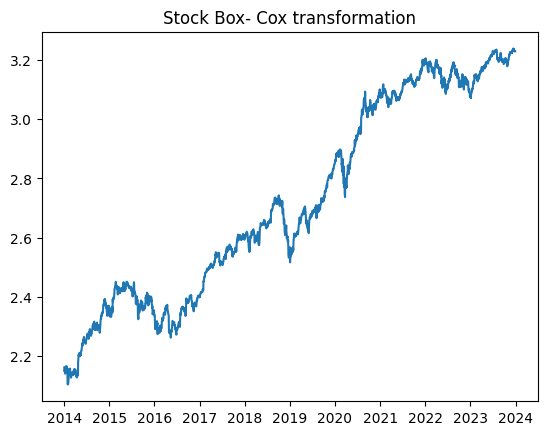

In [83]:
#plot line
plt.title('Stock Box- Cox transformation')
plt.plot(df['boxcox'])
plt.show()

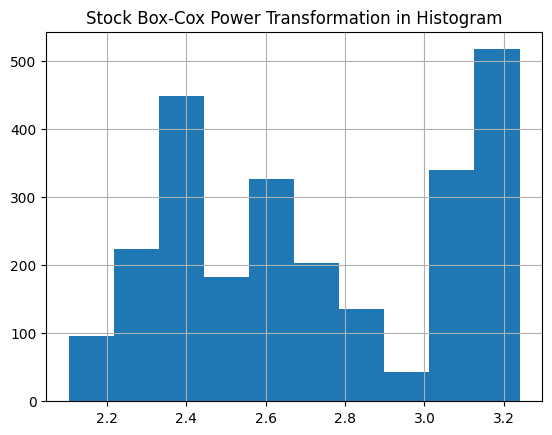

In [84]:
# Plot histogram
plt.title('Stock Box-Cox Power Transformation in Histogram')
plt.hist(df['boxcox'])
plt.grid()
plt.show()